### Imports

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from IPython.display import display

### Plotting Style

In [68]:
sns.set_style("darkgrid")
plt.rcParams['axes.axisbelow'] = True


# 1. Loading Data

In [13]:
tables=[]

print("=======================Aisles=======================")
aisles = pd.read_csv("Dataset/aisles.csv", sep=",")
display(aisles.head())
print("Aisles loaded with", len(aisles), "rows")
tables.append(aisles)

print("\n====================Departments=====================")
departments = pd.read_csv("Dataset/departments.csv", sep=",")
display(departments.head())
print("Departments loaded with", len(departments), "rows")
tables.append(departments)

print("\n=======================Orders=======================")
orders = pd.read_csv("Dataset/orders.csv", sep=",")
display(orders.head())
print("Orders loaded with", len(orders), "rows")
tables.append(orders)

print("\n====================Products========================")
products = pd.read_csv("Dataset/products.csv", sep=",")
display(products.head())
print("Products loaded with", len(products), "rows")
tables.append(products)

print("\n================Order Products Prior================")
ordProdPrior = pd.read_csv("Dataset/order_products__prior.csv", sep=",")
display(ordProdPrior.head())
print("Order Products Prior loaded with", len(ordProdPrior), "rows")
tables.append(ordProdPrior)

print("\n================Order Products Train================")
ordProdTrain = pd.read_csv("Dataset/order_products__train.csv", sep=",")
display(ordProdTrain.head())
print("Order Products Train loaded with", len(ordProdTrain), "rows")
tables.append(ordProdTrain)

=======================Aisles=======================


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Aisles loaded with 134 rows

====================Departments=====================


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Departments loaded with 21 rows

=======================Orders=======================


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Orders loaded with 3421083 rows

====================Products========================


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


Products loaded with 49688 rows

================Order Products Prior================


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


Order Products Prior loaded with 32434489 rows

================Order Products Train================


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


Order Products Train loaded with 1384617 rows


The dataset has over 3 million orders made by the company's customers. This shows the need of using big data processing frameworks later on the project.

# 2. Data Cleaning

### 2.1 Checking for missing values

In [3]:
#check whether there are missing values in every data table
print("Missing aisles?",aisles.isnull().values.any())
print("Missing departments?", departments.isnull().values.any())
print("Missing orders?", orders.isnull().values.any())
print("Missing products?", products.isnull().values.any())
print("Missing order products prior?", ordProdPrior.isnull().values.any())
print("Missing order products train?", ordProdTrain.isnull().values.any())


Missing aisles? False
Missing departments? False
Missing orders? True
Missing products? False
Missing order products prior? False
Missing order products train? False


Orders is the only table having missing values. We'll take a closer look.

In [4]:
#check which columns have missing values
print(orders.isnull().sum())

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64


Days since prior order is the only column with missing values, which makes sense as a missing value most probably indicates that this is the customer's first order. Hence, I will not change anything.

# 3. Preprocessing

### 3.1 Checking for Outliers

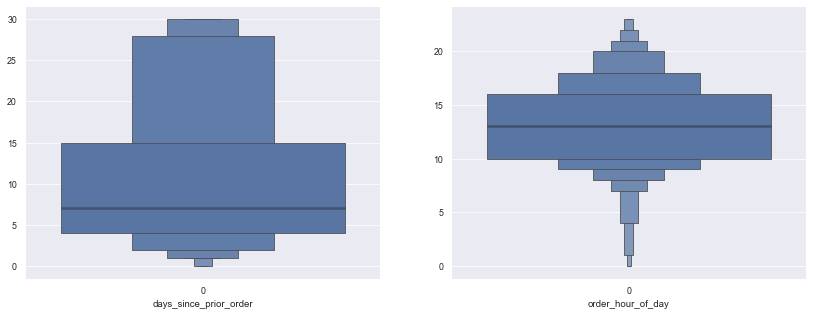

In [69]:
features = ["days_since_prior_order", "order_hour_of_day"]
fig, axs = plt.subplots(ncols=len(features), figsize=(7*len(features), 5))
for i in range(len(features)):
  sns.boxenplot(data=orders[features[i]],
                showfliers=True,
                ax=axs[i],
                ).set(xlabel=features[i])
  sns.despine()


The data seems to be clear of outliers. Overall, the data is clean and doesn't require preprocessing.

# 3. Segmentation

In this section, Spark will be used to apply k-means clustering on the data using map reduce.

### 3.1 Customer-level Segmentation

''